# Movies (1960-2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> #### In this report, we'll be investigating a data set containing information about 10,000 movies collected from The Movie Database (TMDb).

> #### Questions:
>> **1. Does The duration of a movie affects its popularity & revenue?**
>> **2. Does the film industry have greater budgets and gather more revenue over the years?**
>> **3. Properties associated with movies having high revenue?**


In [1]:
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

### General overview of the data

In [4]:
Movies = pd.read_csv('tmdb-movies_original.csv')
Movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
Movies.shape

(10866, 21)

***Removing Columns "ID", "IMDB_ID". "HOMEPAGE", "OVERVIEW", "TAGLINE" & "KEYWORDS" As They're Irrelevant.***

In [6]:
Movies.drop(['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords'], axis=1, inplace=True)

In [7]:
Movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
Movies.info()

<class 'pandas.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  str    
 4   cast                  10790 non-null  str    
 5   director              10822 non-null  str    
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  str    
 8   production_companies  9836 non-null   str    
 9   release_date          10866 non-null  str    
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), str(6

### Main issues with the dataset
* > #### **Column Cast, Director, Genres & Production Companies have missing values.**
* > #### **Release Date column is not in date format.**
* > #### **Cast, Director, Genres & Production Companies columns should contain lists with all their content instead of a long sentence**

<a id='wrangling'></a>
## Data Cleaning

#### First, we'll be addressing The _missing values_ problem by:
> * ##### **Check the distribution of each column in the dataset before and after dropping the missing values to see if it'll disturb the distribution.**

> * ##### **If a distribution (post-drop) seems different from the original (pre-drop), we'll focus on it to evaluate whether it'll be possible to drop that NaN values in that column or not.**

> * ##### **If all distributions seem like the original, the dropping the nan values would be the option I'll go with.**

##### 1. **Cast**

In [9]:
print(f"rows: {Movies.query('cast.isnull()').shape[0]}")
Movies.query('cast.isnull()').head()

rows: 76


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,2015,0.0,0.0
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,2015,0.0,0.0
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0


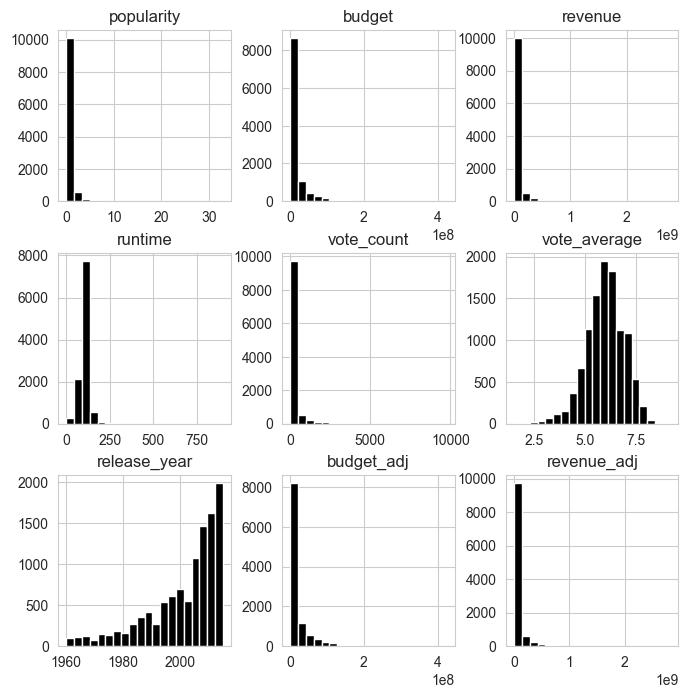

In [10]:
Movies.hist(figsize=(8, 8), color='Black', bins=20);

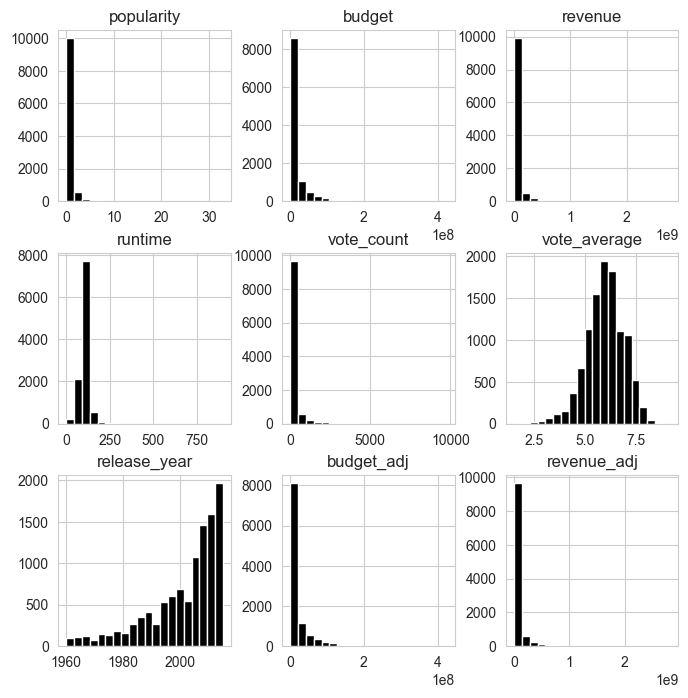

In [11]:
Movies.query('cast.isnull() == False').hist(figsize=(8, 8), color='Black', bins=20);

###### **Conclusion:**
> * There seems to be no ***major*** difference between the distributions.

> * The NaN values in Cast column can be removed.

##### 2. **Director**

In [12]:
print(f"rows: {Movies.query('director.isnull()').shape[0]}")
Movies.query('director.isnull()').head()

rows: 44


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.0,0.0
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.0,0.0
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.0,0.0


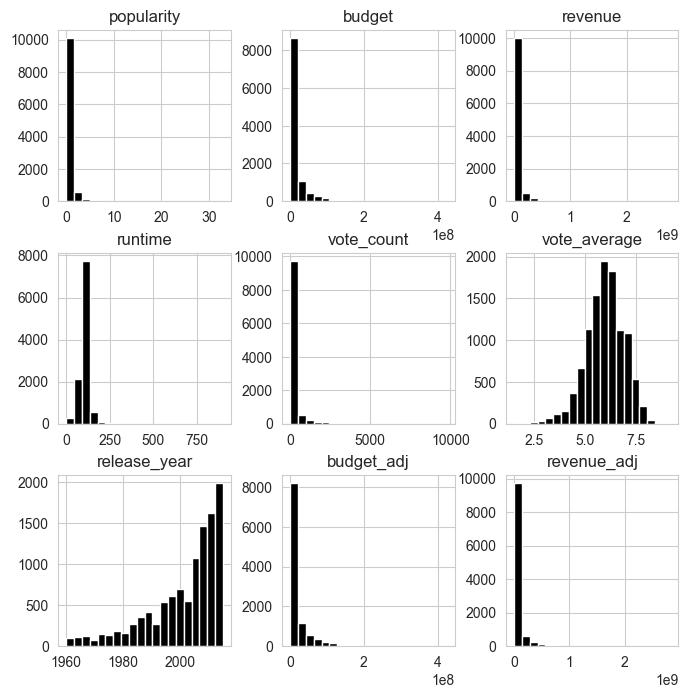

In [13]:
Movies.hist(figsize=(8, 8), color='Black', bins=20);

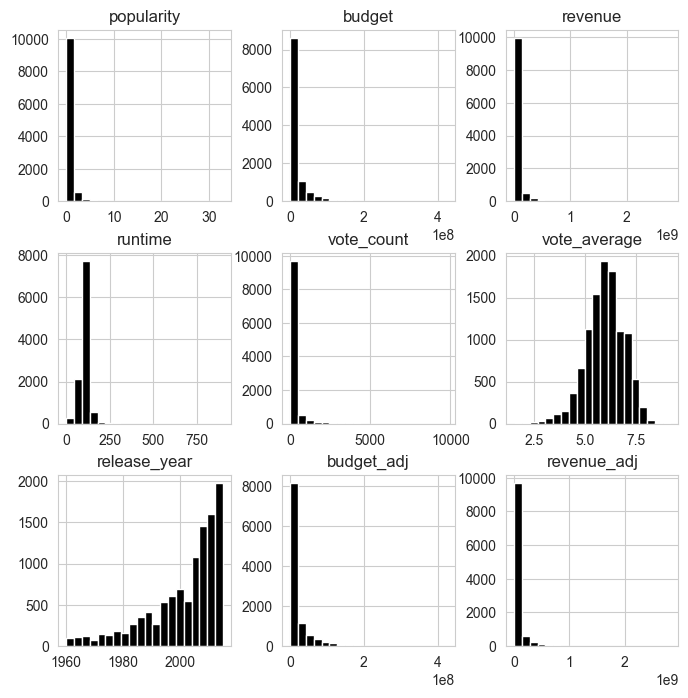

In [14]:
Movies.query('director.isnull() == False').hist(figsize=(8, 8), color='Black', bins=20);

###### **Conclusion:**
> * There seems to be no ***major*** difference between the distributions.

> * The NaN values in Director column can be removed.

##### 3. **Genres**

In [15]:
print(f"rows: {Movies.query('genres.isnull()').shape[0]}")
Movies.query('genres.isnull()').head()

rows: 23


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009,0.0,0.0


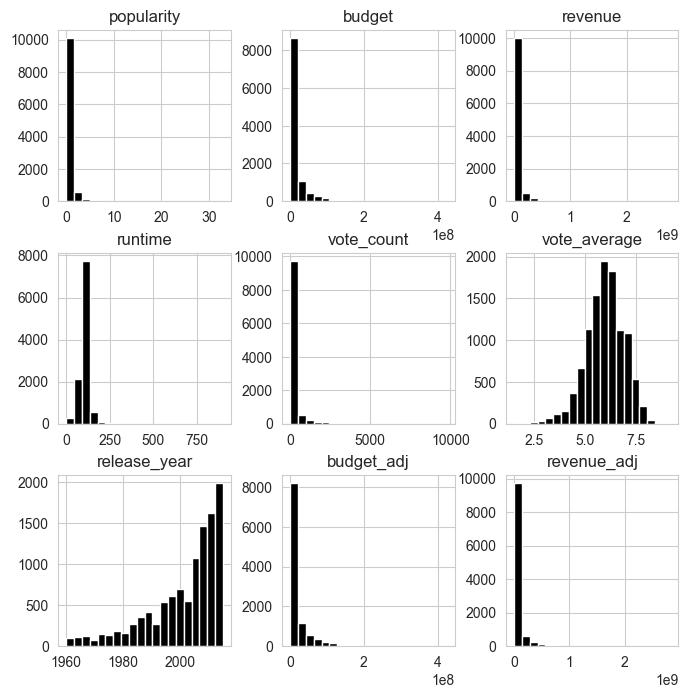

In [16]:
Movies.hist(figsize=(8, 8), color='Black', bins=20);

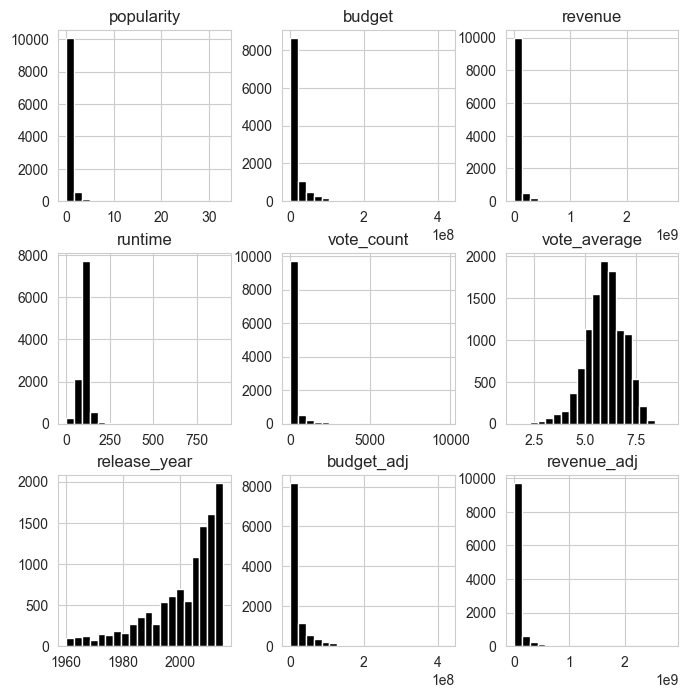

In [17]:
Movies.query('genres.isnull() == False').hist(figsize=(8, 8), color='Black', bins=20);

###### **Conclusion:**
> * There seems to be no ***major*** difference between the distributions.

> * The NaN values in Genres column can be removed.

##### 4. **Production Companies**

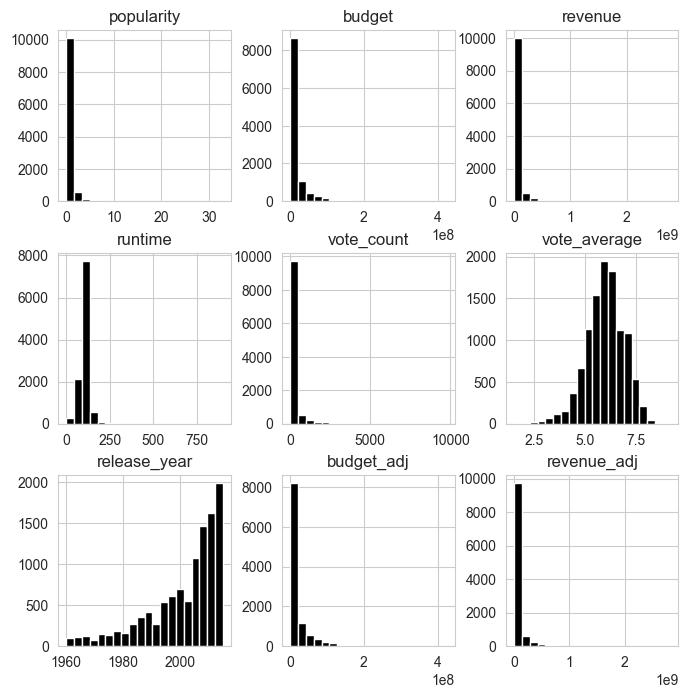

In [18]:
Movies.hist(figsize=(8, 8), color='Black', bins=20);

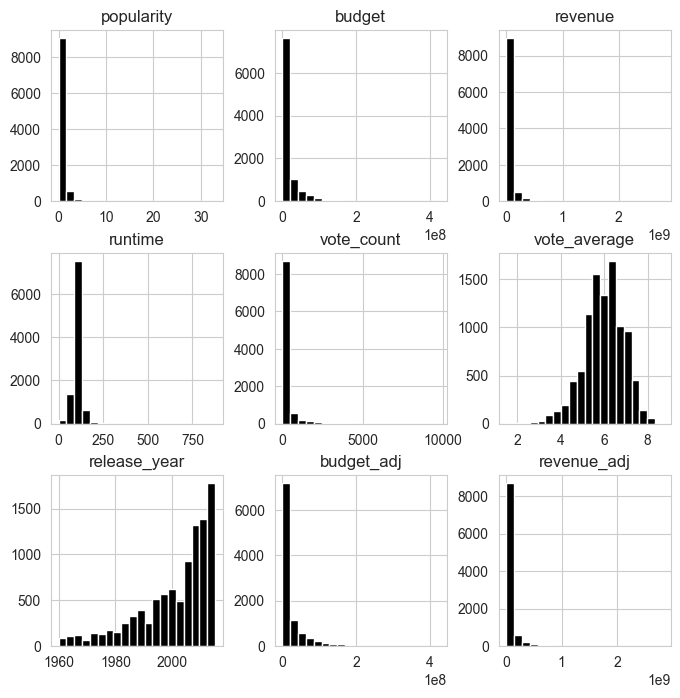

In [19]:
Movies.query('production_companies.isnull() == False').hist(figsize=(8, 8), color='Black', bins=20);

###### **It seems like there's a change in the vote average column.**
###### **We've got to check the distribution before and after the drop**

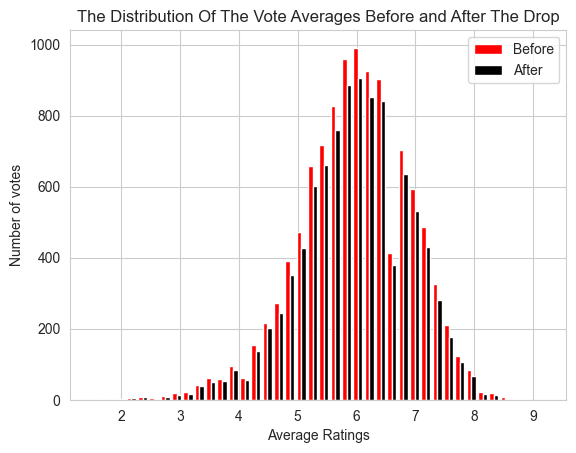

In [20]:
plt.hist([Movies.vote_average, Movies.query('production_companies.isnull() == False').vote_average], color=['Red', 'Black'], bins=40, label=['Before', 'After'])
plt.title('The Distribution Of The Vote Averages Before and After The Drop')
plt.xlabel('Average Ratings')
plt.ylabel('Number of votes')
plt.legend();

###### **Conclusion:**
> * There seems to be no ***major*** change when the number of bins increased.

> * The NaN values in Production Companies column can be removed.

###### **Dropping Nan Values from all the addressed columns since they won't affect the distribution of the data set.**

In [21]:
Movies.dropna(subset=['cast', 'director', 'genres', 'production_companies'], axis=0, inplace=True)
Movies.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Second, we'll be addressing The _wrong format_ problem by:
> ##### **Assigning The correct data type to the Release Date Column**

In [22]:
Movies.release_date = pd.to_datetime(Movies.release_date, format='%m/%d/%y')
print(Movies.release_date.dtype)

datetime64[us]


> ##### **Adding Day & Month columns then removing the release_date column**

In [23]:
Movies.insert(12, 'release_month', Movies.release_date.dt.month, True)
Movies.insert(13, 'release_month_name', Movies.release_date.dt.month_name(), True)

In [24]:
Movies.insert(12, 'release_day', Movies.release_date.dt.day, True)
Movies.insert(13, 'release_day_name', Movies.release_date.dt.day_name(), True)

In [25]:
Movies.drop('release_date', axis=1).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_day,release_day_name,release_month,release_month_name,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,9,Tuesday,6,June,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,13,Wednesday,5,May,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,18,Wednesday,3,March,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,15,Tuesday,12,December,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,1,Wednesday,4,April,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,25,Friday,12,December,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,23,Tuesday,6,June,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,30,Wednesday,9,September,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,17,Wednesday,6,June,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,9,Tuesday,6,June,2015,1.609999e+08,7.854116e+08


#### Third, we'll be converting the content of Cast, Director, Genres & Production Companies columns to a list with their contents

In [26]:
Movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_day,release_day_name,release_month,release_month_name,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,9,Tuesday,6,June,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,13,Wednesday,5,May,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,18,Wednesday,3,March,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,15,Tuesday,12,December,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1,Wednesday,4,April,2015,1.747999e+08,1.385749e+09


In [27]:
Movies.director = Movies.director.apply(lambda x: x.split('|'))
Movies.director.head()

0     [Colin Trevorrow]
1       [George Miller]
2    [Robert Schwentke]
3         [J.J. Abrams]
4           [James Wan]
Name: director, dtype: object

In [28]:
Movies.cast = Movies.cast.apply(lambda x: x.split('|'))
Movies.cast.head()

0    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1    [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2    [Shailene Woodley, Theo James, Kate Winslet, A...
3    [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4    [Vin Diesel, Paul Walker, Jason Statham, Miche...
Name: cast, dtype: object

In [29]:
Movies.genres = Movies.genres.apply(lambda x: x.split('|'))
Movies.genres.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [30]:
Movies.production_companies = Movies.production_companies.apply(lambda x: x.split('|'))
Movies.production_companies.head()

0    [Universal Studios, Amblin Entertainment, Lege...
1    [Village Roadshow Pictures, Kennedy Miller Pro...
2    [Summit Entertainment, Mandeville Films, Red W...
3        [Lucasfilm, Truenorth Productions, Bad Robot]
4    [Universal Pictures, Original Film, Media Righ...
Name: production_companies, dtype: object

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1: Does The duration of a movie affects its popularity & revenue?

**First, we'll categorise the data using bins.**

In [31]:
Movies.runtime.describe()

count    9773.000000
mean      102.925509
std        27.876224
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [32]:
bin_edges = [Movies.runtime.describe()['min'],
             Movies.runtime.describe()['25%'],
             Movies.runtime.describe()['50%'],
             Movies.runtime.describe()['75%'],
             Movies.runtime.describe()['max']]

In [33]:
bin_names = ['Very Short',
             'Short',
             'Medium',
             'Long']

In [34]:
Movies['duration'] = pd.cut(Movies.runtime, bin_edges, labels=bin_names)
print(Movies.duration.dtype)

category


###### **The data type needs to be changed to string, so we can modify the column values easily**

In [35]:
Movies.duration = Movies.duration.astype('O')

In [36]:
Movies.info()

<class 'pandas.DataFrame'>
Index: 9773 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9773 non-null   float64       
 1   budget                9773 non-null   int64         
 2   revenue               9773 non-null   int64         
 3   original_title        9773 non-null   str           
 4   cast                  9773 non-null   object        
 5   director              9773 non-null   object        
 6   runtime               9773 non-null   int64         
 7   genres                9773 non-null   object        
 8   production_companies  9773 non-null   object        
 9   release_date          9773 non-null   datetime64[us]
 10  vote_count            9773 non-null   int64         
 11  vote_average          9773 non-null   float64       
 12  release_day           9773 non-null   int32         
 13  release_day_name      9773 non-nu

**There seems to be some missing values, we'll have to clean them**

In [37]:
print(f"rows: {Movies.query('duration.isnull()').shape[0]}")
Movies.query('duration.isnull()').head()

rows: 13


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_day,release_day_name,release_month,release_month_name,release_year,budget_adj,revenue_adj,duration
92,1.876037,0,0,Mythica: The Necromancer,"[Melanie Stone, Adam Johnson, Kevin Sorbo, Nic...",[A. Todd Smith],0,"[Fantasy, Action, Adventure]","[Arrowstorm Entertainment, Camera 40 Productio...",2015-12-19,11,5.4,19,Saturday,12,December,2015,0.000000e+00,0.0,NaN
334,0.357654,0,0,Ronaldo,[Cristiano Ronaldo],[Anthony Wonke],0,[Documentary],"[On The Corner Films, We Came, We Saw, We Conq...",2015-11-09,80,6.5,9,Monday,11,November,2015,0.000000e+00,0.0,NaN
445,0.218528,0,0,The Exorcism of Molly Hartley,"[Sarah Lind, Devon Sawa, Gina Holden, Peter Ma...",[Steven R. Monroe],0,[Horror],[WT Canada Productions],2015-10-09,52,5.0,9,Friday,10,October,2015,0.000000e+00,0.0,NaN
486,0.176744,0,0,If There Be Thorns,"[Heather Graham, Jason Lewis, Rachael Carpani,...",[Nancy Savoca],0,"[TV Movie, Drama]","[A+E Studios, Jane Startz Productions]",2015-04-05,11,5.4,5,Sunday,4,April,2015,0.000000e+00,0.0,NaN
1289,0.037459,3250000,0,Treehouse,"[J. Michael Trautmann, Dana Melanie, Daniel Fr...",[Michael G. Bartlett],0,"[Thriller, Horror, Mystery]",[Tiberius Film],2014-10-20,16,3.4,20,Monday,10,October,2014,2.993546e+06,0.0,NaN


**We'll replace the NaN values with "No runtime"**

In [38]:
Movies['duration'] = Movies['duration'].fillna('No runtime')
Movies.duration.unique()

array(['Long', 'Short', 'Medium', 'Very Short', 'No runtime'],
      dtype=object)

In [39]:
print(f"rows: {Movies.query('duration.isnull()').shape[0]}")
Movies.query('duration.isnull()').head()

rows: 0


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_day,release_day_name,release_month,release_month_name,release_year,budget_adj,revenue_adj,duration


**Creating proportionate values for popularity with respect to the duration of the movies, then listing them**

In [40]:
NR_pop_avg = Movies.query('duration == "No runtime"').popularity.mean()
VS_pop_avg = Movies.query('duration == "Very Short"').popularity.mean()
S_pop_avg = Movies.query('duration == "Short"').popularity.mean()
M_pop_avg = Movies.query('duration == "Medium"').popularity.mean()
L_pop_avg = Movies.query('duration == "Long"').popularity.mean()
PAVG_mock = [VS_pop_avg, S_pop_avg, M_pop_avg, L_pop_avg]

In [41]:
PAVG = []
x1 = sum(PAVG_mock)
for i in PAVG_mock:
    PAVG.append(i/x1)
PAVG

[np.float64(0.160616841699796),
 np.float64(0.20972238447337047),
 np.float64(0.24660935085456634),
 np.float64(0.3830514229722672)]

**Creating proportionate values for revenues with respect to the duration of the movies, then listing them**

In [42]:
NR_rev_avg = Movies.query('duration == "No runtime"').revenue.mean()
VS_rev_avg = Movies.query('duration == "Very Short"').revenue.mean()
S_rev_avg = Movies.query('duration == "Short"').revenue.mean()
M_rev_avg = Movies.query('duration == "Medium"').revenue.mean()
L_rev_avg = Movies.query('duration == "Long"').revenue.mean()
RAVG_mock = [VS_rev_avg, S_rev_avg, M_rev_avg, L_rev_avg]

In [43]:
RAVG = []
x2 = sum(RAVG_mock)
for i in RAVG_mock:
    RAVG.append(i/x2)
RAVG

[np.float64(0.087034691459096),
 np.float64(0.16707629111919164),
 np.float64(0.21889612426695831),
 np.float64(0.5269928931547542)]

**Creating a plot to illustrate the average popularity & revenues with respect to the duration of the movies**

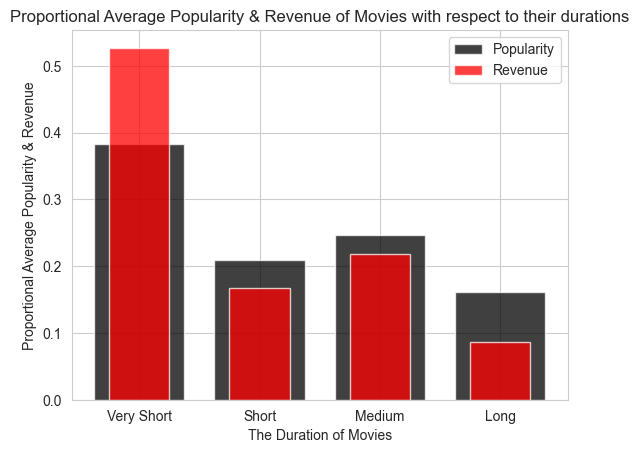

In [44]:
Locations_Q1 = [3, 1, 2, 0]
X_ticks_Q1 = Movies.duration.unique()[:-1]
plt.bar(Locations_Q1, height=PAVG, tick_label=X_ticks_Q1, width=.75, color='Black', alpha=0.75)
plt.bar(Locations_Q1, height=RAVG, tick_label=X_ticks_Q1, width=.5,color='Red', alpha=0.75)
plt.title('Proportional Average Popularity & Revenue of Movies with respect to their durations')
plt.xlabel('The Duration of Movies')
plt.ylabel('Proportional Average Popularity & Revenue')
plt.legend(['Popularity', 'Revenue']);

### Research Question 2  Does the film industry have greater budgets and gather more revenue over the years?

###### **Creating bins to categorise movies every by a 5-year interval**

In [45]:
Movies['Bin_year_int'] = pd.cut(Movies.release_year, bins=11)

###### **Creating proportionate values for the popularity**

In [46]:
Budg_every_5y_sum = Movies.groupby('Bin_year_int').budget.mean().sum()
Budg_every_5y = Movies.groupby('Bin_year_int').budget.mean()/Budg_every_5y_sum

###### **Creating Revenue values for the popularity**

In [47]:
Rev_every_5y_sum = Movies.groupby('Bin_year_int').revenue.mean().sum()
Rev_every_5y = Movies.groupby('Bin_year_int').revenue.mean()/Rev_every_5y_sum

###### **Creating variables required for the plot**

In [48]:
Locations_Q2 = np.arange(11)
X_ticks_Q2 = sorted(Movies.Bin_year_int.unique())

###### **Creating the plot**

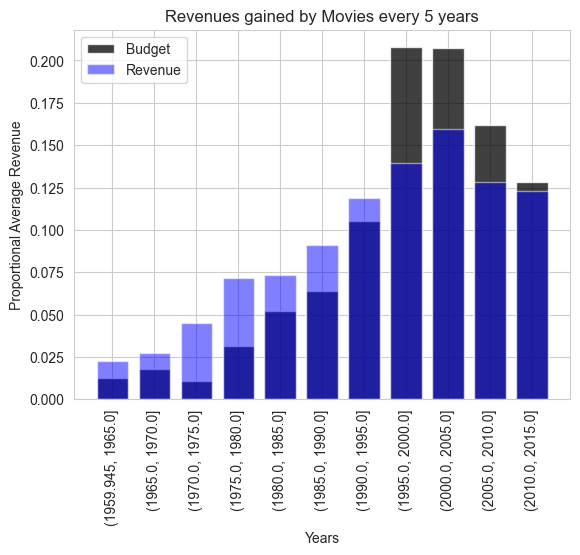

In [49]:
plt.bar(Locations_Q2, height=Budg_every_5y, tick_label=X_ticks_Q2, width=.75, color='Black', alpha=0.75)
plt.bar(Locations_Q2, height=Rev_every_5y, tick_label=X_ticks_Q2, width=.75, color='Blue', alpha=0.5)
plt.xticks(rotation=90)
plt.title('Revenues gained by Movies every 5 years')
plt.xlabel('Years')
plt.ylabel('Proportional Average Revenue')
plt.legend(['Budget', 'Revenue']);

### Research Question 3: Properties associated with movies having high revenue?

In [50]:
Low_rev = Movies.query('revenue < revenue.mean()')
High_rev = Movies.query('revenue >= revenue.mean()')

In [51]:
Movies.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,...,vote_average,release_day,release_day_name,release_month,release_month_name,release_year,budget_adj,revenue_adj,duration,Bin_year_int
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,...,6.5,9,Tuesday,6,June,2015,1.379999e+08,1.392446e+09,Long,"(2010.0, 2015.0]"


In [52]:
Y_label = ['popularity', 'runtime', 'vote_average', 'budget']
X_label = 'Type'
Loc = [0, 1]

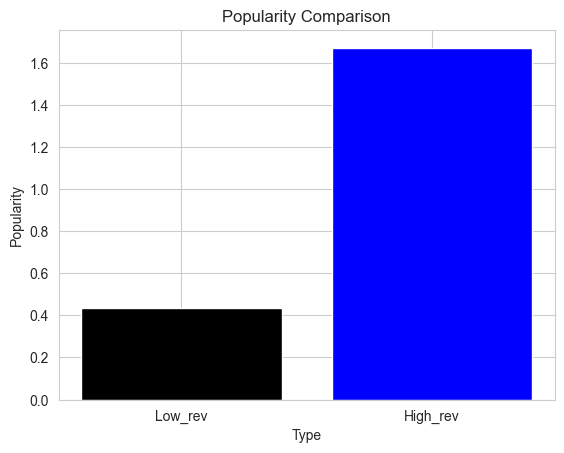

In [53]:
plt.bar(0, Low_rev.popularity.mean(), color='Black')
plt.bar(1, High_rev.popularity.mean(), color='Blue')

plt.title('Popularity Comparison')

plt.xlabel(X_label)

plt.ylabel(Y_label[0].replace('_', ' ').title())

plt.xticks(Loc, ['Low_rev', 'High_rev']);

###### **Conclusion:**
> * There seems to be a major difference between low revenue and high revenue movies when it comes to popularity

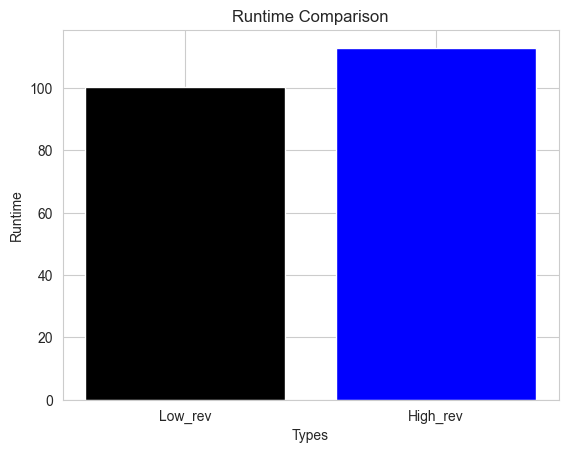

In [54]:
plt.bar(0, Low_rev.runtime.mean(), color='Black')
plt.bar(1, High_rev.runtime.mean(), color='Blue')

plt.title('Runtime Comparison')

plt.xlabel('Types')

plt.ylabel(Y_label[1].replace('_', ' ').title())

plt.xticks(Loc, ['Low_rev', 'High_rev']);

###### **Conclusion:**
> * There seems to be no major difference between low revenue and high revenue movies when it comes to runtime.

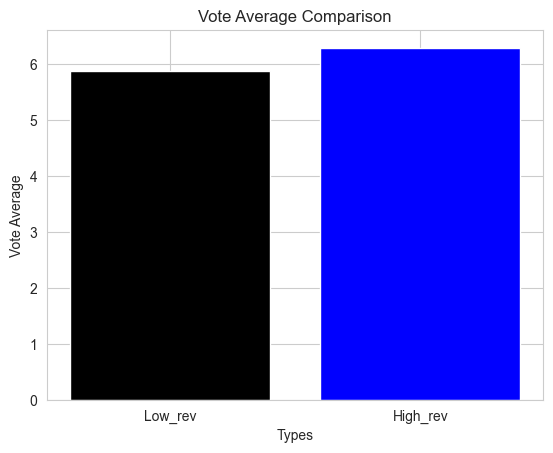

In [55]:
plt.bar(0, Low_rev.vote_average.mean(), color='Black')
plt.bar(1, High_rev.vote_average.mean(), color='Blue')

plt.title('Vote Average Comparison')

plt.xlabel('Types')

plt.ylabel(Y_label[2].replace('_', ' ').title())

plt.xticks(Loc, ['Low_rev', 'High_rev']);

###### **Conclusion:**
> * There seems to be no major difference between low revenue and high revenue movies when it comes to vote average.

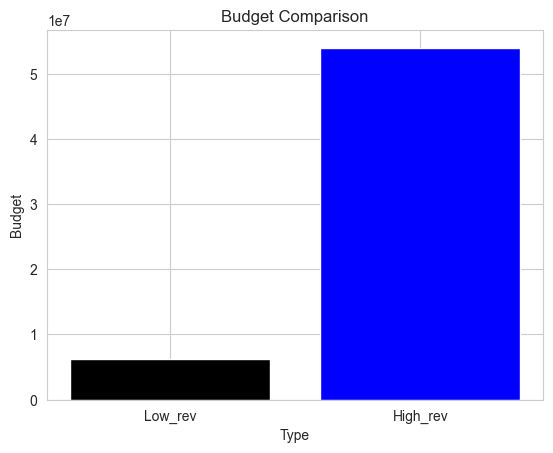

In [56]:
plt.bar(0, Low_rev.budget.mean(), color='Black')
plt.bar(1, High_rev.budget.mean(), color='Blue')

plt.title('Budget Comparison')

plt.xlabel(X_label)

plt.ylabel(Y_label[3].replace('_', ' ').title())

plt.xticks(Loc, ['Low_rev', 'High_rev']);

###### **Conclusion:**
> * There seems to be major difference between low revenue and high revenue movies when it comes to budget.

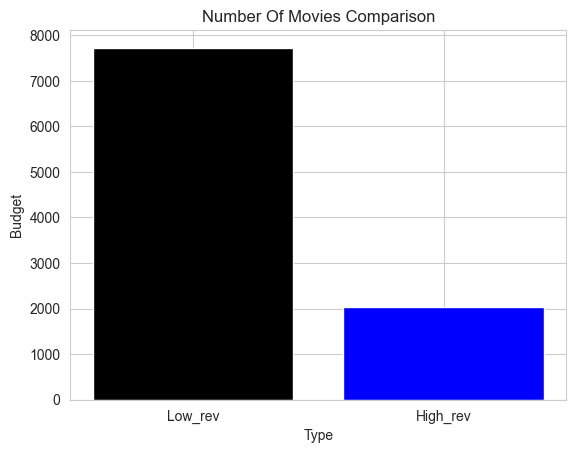

In [57]:
plt.bar(0, Low_rev.original_title.count(), color='Black')
plt.bar(1, High_rev.original_title.count(), color='Blue')

plt.title('Number Of Movies Comparison')

plt.xlabel(X_label)

plt.ylabel(Y_label[3].replace('_', ' ').title())

plt.xticks(Loc, ['Low_rev', 'High_rev']);

<a id='conclusions'></a>
## Conclusions

> **Answer to Q1**: There seems to be a negative correlation between the duration of movies and:
>>> * Popularity
>>> * Revenue

>> The longer the movie is, the lower the popularity and revenues get. (**Note:** This isn't a certain conclusion)

> **Answer to Q2**: The distribution of time & Revenue/Budget is left skewed.

>> Which implies that the budget and revenue began to rise over time. (**Note:** This isn't a certain conclusion)

> **Answer to Q3**: The Three main features that can be associated with increase in the revenue are:
>>> * Popularity
>>> * Budget

>> This means that the higher the budget & popularity, the more likely that this movie has gained a high revenue. (**Note:** This isn't a certain conclusion)

In [58]:
Movies.to_csv('tmdb-movies_modified.csv')